# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [98]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [99]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [100]:
#get info through APIs
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_info = requests.get(query_url + city)
weather_json = weather_info.json()
print(weather_json)


{'cod': '404', 'message': 'city not found'}


In [101]:
print(requests.get(query_url + city))

<Response [404]>


In [102]:
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Finished Getting Data")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Larsnes
City not found. Skipping...
Processing Record 2 | Deputatsky
Processing Record 3 | Barra de Tecoanapa
Processing Record 4 | Albany
Processing Record 5 | Hong Kong
Processing Record 6 | Port Alfred
Processing Record 7 | Atuona
Processing Record 8 | Galle
Processing Record 9 | Coyhaique
Processing Record 10 | Touros
Processing Record 11 | Kaka
Processing Record 12 | Anloga
Processing Record 13 | Bredasdorp
Processing Record 14 | Ribeira Grande
Processing Record 15 | Dalvik
Processing Record 16 | Bom Conselho
Processing Record 17 | Bluff
Processing Record 18 | Nanga Eboko
Processing Record 19 | Vaini
Processing Record 20 | Arraial do Cabo
Processing Record 21 | Porto-Novo
Processing Record 22 | Akdepe
Processing Record 23 | Ushuaia
City not found. Skipping...
Processing Record 24 | La Paz
City not found. Skipping...
Processing Record 25 | Mataura
Processing Record 26 | Rikitea
Processing Record 27 | Hit

Processing Record 229 | Harper
Processing Record 230 | Kloulklubed
Processing Record 231 | Srednekolymsk
Processing Record 232 | Koslan
Processing Record 233 | Mount Gambier
Processing Record 234 | São José dos Pinhais
Processing Record 235 | Arcata
Processing Record 236 | Shakhtinsk
Processing Record 237 | Kruisfontein
Processing Record 238 | Lae
Processing Record 239 | Puerto Escondido
Processing Record 240 | Tilichiki
Processing Record 241 | Jasper
Processing Record 242 | Baykit
Processing Record 243 | Castro
Processing Record 244 | Bayan
City not found. Skipping...
Processing Record 245 | Tautira
Processing Record 246 | Øksfjord
Processing Record 247 | Sinnamary
Processing Record 248 | Fernie
Processing Record 249 | Neftegorsk
Processing Record 250 | Constitución
Processing Record 251 | Salalah
Processing Record 252 | São Filipe
Processing Record 253 | Bagotville
Processing Record 254 | Vila Velha
Processing Record 255 | Şırnak
Processing Record 256 | Lorengau
Processing Record 257

Processing Record 455 | Morón
Processing Record 456 | Mawlaik
Processing Record 457 | Port Macquarie
Processing Record 458 | Kavieng
Processing Record 459 | Yola
Processing Record 460 | Hue
Processing Record 461 | Rizhao
Processing Record 462 | Luba
Processing Record 463 | Port Augusta
Processing Record 464 | Atbasar
Processing Record 465 | Port Lincoln
Processing Record 466 | Sur
Processing Record 467 | Kapoeta
Processing Record 468 | Nome
Processing Record 469 | Tevaitoa
Processing Record 470 | Santa Cruz de la Sierra
Processing Record 471 | Saint-Louis
Processing Record 472 | Husavik
Processing Record 473 | Agadez
Processing Record 474 | Bose
Processing Record 475 | Alofi
Processing Record 476 | Novopokrovka
Processing Record 477 | Ust'-Ilimsk
Processing Record 478 | Uspenka
Processing Record 479 | San Vicente
Processing Record 480 | Zawadzkie
Processing Record 481 | Bāndarban
Processing Record 482 | Pedasí
Processing Record 483 | Creetown
City not found. Skipping...
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [103]:
weather_dict = {
    "City": city_name,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
   }

weather_info = pd.DataFrame(weather_dict)
# weather_info.count()

In [104]:
weather_info.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Larsnes,62.2028,5.5773,2.78,86,40,1.03,NO,1613456205
1,Deputatsky,69.3000,139.9000,-31.51,88,21,0.34,RU,1613456206
2,Barra de Tecoanapa,16.5167,-98.7500,20.09,84,19,2.07,MX,1613456206
3,Albany,42.6001,-73.9662,-2.22,79,100,1.08,US,1613456206
4,Hong Kong,22.2855,114.1577,22.78,60,0,1.34,HK,1613456043


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [105]:
weather_info.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,19.719827,15.528963,10.083982,73.710714,53.942857,3.689982,1.613456e+09
std,33.250703,89.647958,17.910705,19.867861,38.664285,2.598599,6.310202e+01
min,-54.800000,-175.200000,-34.360000,7.000000,0.000000,0.070000,1.613456e+09
25%,-6.908575,-62.061075,-2.320000,65.000000,14.500000,1.540000,1.613456e+09
50%,22.426100,18.859600,15.000000,79.000000,63.000000,3.095000,1.613456e+09
75%,47.095525,92.326325,25.000000,88.000000,90.000000,5.140000,1.613456e+09
max,78.218600,179.316700,39.000000,100.000000,100.000000,14.470000,1.613456e+09


In [106]:
# Max Humidity 100. Nothing to remove.

In [121]:
# Save city data into a csv file
weather_info.to_csv("../output_data/cities.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

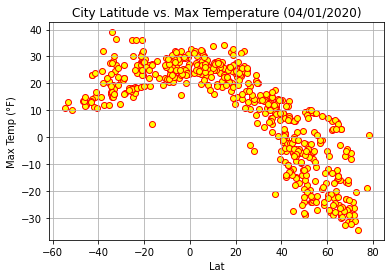

In [107]:
# Build Scatter Plot for Requirement
plt.scatter(weather_info["Lat"], weather_info["Max Temp"], facecolors="yellow", marker="o", edgecolor="red")

# Graph Labels
plt.title("City Latitude vs. Max Temperature (04/01/2020)")
plt.ylabel("Max Temp (°F)")
plt.xlabel("Lat")
plt.grid(True)

# Save Image
plt.savefig("../output_data/City Latitude vs. Temperature Plot.png")

# Show Plot
plt.show()

# Latitude vs. Temperature Plot Explanation

The plot is analyzing temperatures across increasing latitudes. This data set is showing that the higher the latitude the lower the temperatire.

## Latitude vs. Humidity Plot

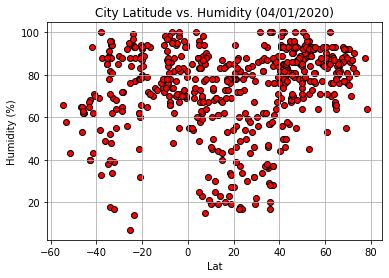

In [108]:

# Build Scatter Plot for Requirement
plt.scatter(weather_info["Lat"], weather_info["Humidity"], facecolors="red", marker="o", edgecolor="black")

# Graph Labels
plt.title("City Latitude vs. Humidity (04/01/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Lat")
plt.grid(True)

# Save Image
plt.savefig("../output_data/City Latitude vs. Humidity.png")

# Show Plot
plt.show()

# Latitude vs. Humidity Plot Explanation

The plot is analyzing humidity across increasing latitudes. 

## Latitude vs. Cloudiness Plot

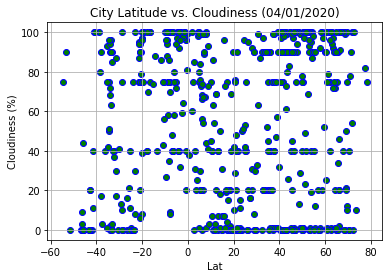

In [109]:
# Build Scatter Plot for Requirement
plt.scatter(weather_info["Lat"], weather_info["Cloudiness"], facecolors="green", marker="o", edgecolor="blue")

# Graph Labels
plt.title("City Latitude vs. Cloudiness (04/01/2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Lat")
plt.grid(True)

# Save Image
plt.savefig("../output_data/City Latitude vs. Cloudiness.png")

# Show Plot
plt.show()


# Latitude vs. Cloudiness Plot Explanation

The plot is analyzing cloudiness across increasing latitudes. 

## Latitude vs. Wind Speed Plot

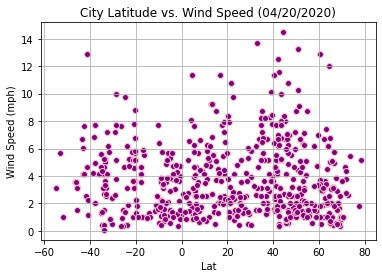

In [110]:
# Build Scatter Plot for Requirement
plt.scatter(weather_info["Lat"], weather_info["Wind Speed"], facecolors="purple", marker="o", edgecolor="pink")

# Graph Labels
plt.title("City Latitude vs. Wind Speed (04/20/2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Lat")
plt.grid(True)

# Save Image
plt.savefig("../output_data/City Latitude vs. Wind Speed.png")

# Show Plot
plt.show()

## Linear Regression

In [111]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_info.loc[weather_info["Lat"] > 0]
southern_hemisphere = weather_info.loc[weather_info["Lat"] < 0]
                                      
def linear_agression(x,y):
    print(f"The r-value is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : -0.87


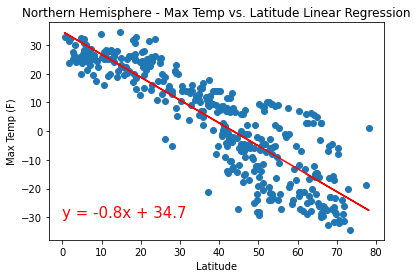

In [112]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
annotate(equation, 0, -30)

# Plot Labels
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save the Image
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression Plot Explanation

There is a strong negative correlation between latitude and high temperatures in the northern hemisphere

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : 0.53


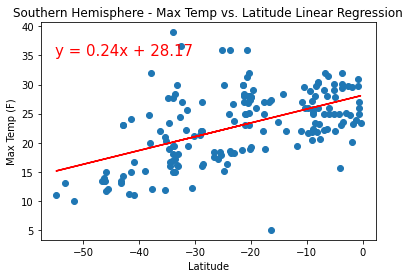

In [113]:
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])
annotate(equation, -55, 35)

# Plot Labels
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save the Image
plt.savefig("../output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression Plot Explanation

There is a some positive correlation between latitude and high temperatures in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.4


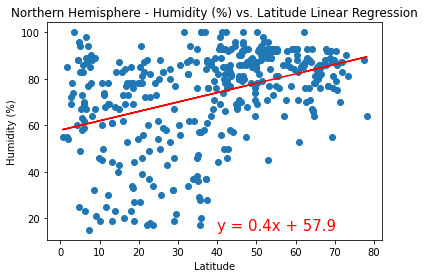

In [114]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
annotate(equation, 40, 15)

# Plot Labels
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the Image
plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression Plot Explanation

There is a some positive correlation between latitude and high temperatures in the southern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.34


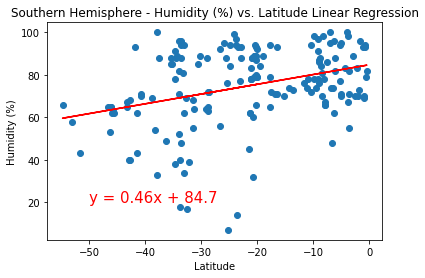

In [115]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
annotate(equation, -50, 20)

# Plot Labels
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the Image
plt.savefig("../output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression Plot Explanation

There is a some positive correlation between latitude and high temperatures in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.17


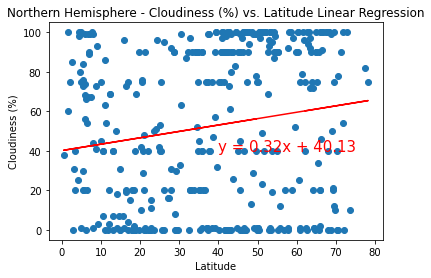

In [116]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

annotate(equation,40,40)

# Plot Labels
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the Iamge
plt.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression Plot Explanation

There is a very low positive correlation between latitude and cloudiness in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.42


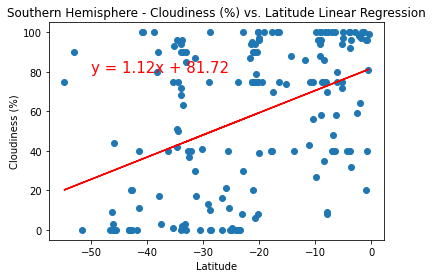

In [117]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
annotate(equation, -50, 80)

# Plot Labels
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the Image
plt.savefig("../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression Plot Explanation

There is a very low positive correlation between latitude and cloudiness in the southern hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : -0.06


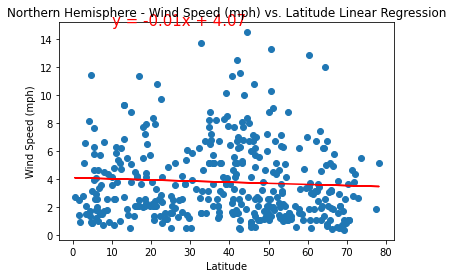

In [118]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
annotate(equation, 10, 15)

# Plot Labels
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the Image
plt.savefig("../output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression Plot Explanation

There is a very low positive correlation between latitude and wind speed (mph) in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : -0.2


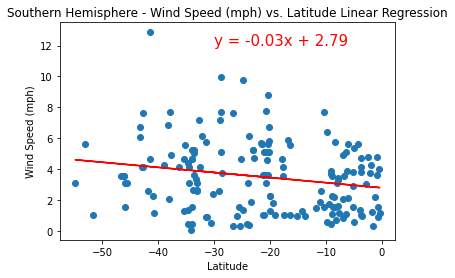

In [119]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
annotate(equation, -30, 12)

# Plot Labels
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the Image
plt.savefig("../output_data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression Plot Explanation


There is a low negative correlation between latitude and wind speed (mph) in the southern hemisphere.